<a href="https://colab.research.google.com/github/IlhamKhalis/PCVK_Ganjil_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

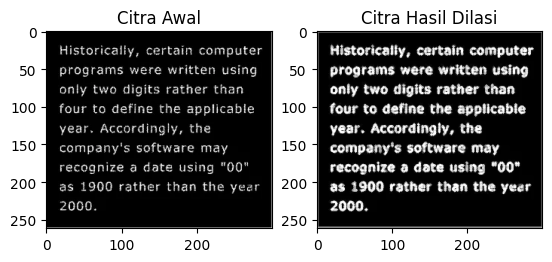

In [3]:
# Fungsi untuk melakukan dilasi
def dilate(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    k_center = (k_height // 2, k_width // 2)

    result = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            max_val = 0
            for ky in range(k_height):
                for kx in range(k_width):
                    img_y = y + ky - k_center[0]
                    img_x = x + kx - k_center[1]
                    if img_y >= 0 and img_y < height and img_x >= 0 and img_x < width:
                        if kernel[ky, kx] == 1 and image[img_y, img_x] > max_val:
                            max_val = image[img_y, img_x]
            result[y, x] = max_val

    return result

# Load gambar sumber

img = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Kernel cross 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Proses dilasi
dilation = dilate(img_gray, kernel)

#fungsi subplots() kita bisa menggambar banyak plot dalam satu gambar.
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Dilasi')

(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

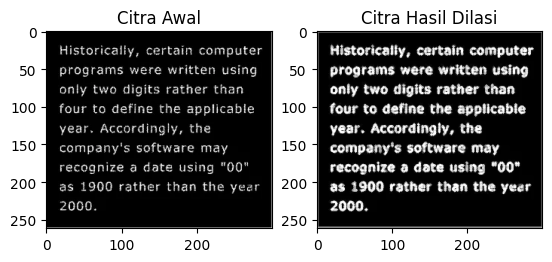

In [4]:
from google.colab.patches import cv2_imshow
import cv2

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Kernel cross 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

# Lakukan dilasi
dilation = cv2.dilate(img_gray, kernel, iterations=1)

# Menampilkan citra asli dan hasil dilasi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Dilasi')

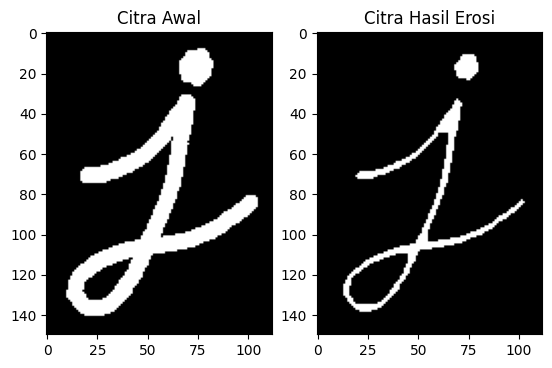

In [5]:

# Fungsi erosi
def erosi(img, se):
    tinggi, lebar = img.shape
    se_tinggi, se_lebar = se.shape
    se_center = (se_tinggi // 2, se_lebar // 2)

    hasil = np.zeros_like(img)

    for y in range(tinggi):
        for x in range(lebar):
            min_val = 255
            for i in range(se_tinggi):
                for j in range(se_lebar):
                    if se[i, j] == 1:
                        img_y = y + i - se_center[0]
                        img_x = x + j - se_center[1]
                        if 0 <= img_y < tinggi and 0 <= img_x < lebar:
                            min_val = min(min_val, img[img_y, img_x])
            hasil[y, x] = min_val

    return hasil

# Baca img
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Erosi (Square 5x5)
se = np.array([[1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1]], dtype=np.uint8)

# Terapkan erosi pada img
hasil_erosi = erosi(img, se)

# Menampilkan img asli dan hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(hasil_erosi, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

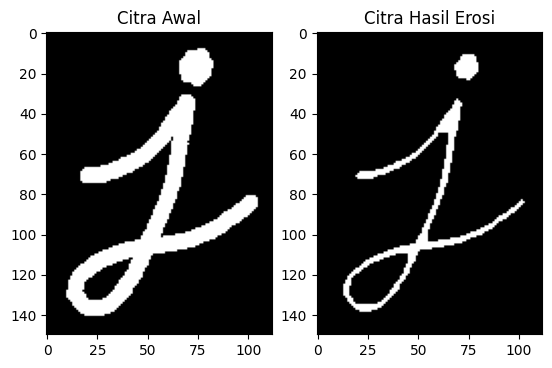

In [6]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Erosi (Square 5x5)
se = np.ones((5, 5), dtype=np.uint8)

# Lakukan erosi
erosion = cv2.erode(img, se, iterations=1)

# Menampilkan citra asli dan hasil erosi
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.show()

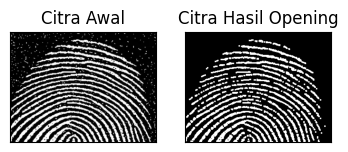

In [7]:
# Baca citra
image_opening = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', 0)
reto, thresho = cv2.threshold(image_opening, 127, 255, cv2.THRESH_BINARY)

k = 3
se = np.ones((k, k), np.uint8)

# Lakukan erosi dan dilasi
erosion = erosi(thresho, se)
dilation = dilate(erosion, se)

# Menampilkan citra asli dan hasil opening
plt.subplot(131), plt.imshow(image_opening, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilation, cmap='gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

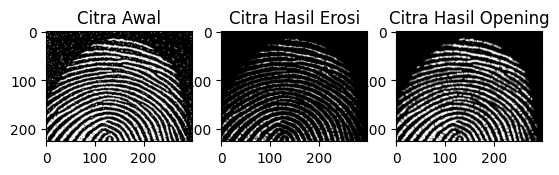

In [8]:
# Baca citra
citra = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3 dalam bentuk array
se = np.ones((3, 3), dtype=np.uint8)

# Lakukan erosi
erosion = erosi(citra, se)

# Lakukan dilasi pada hasil erosi
dilation = dilate(erosion, se)

# Menampilkan citra asli, hasil erosi, dan hasil opening
plt.subplot(131), plt.imshow(citra, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(dilation, cmap='gray'), plt.title('Citra Hasil Opening')
plt.show()

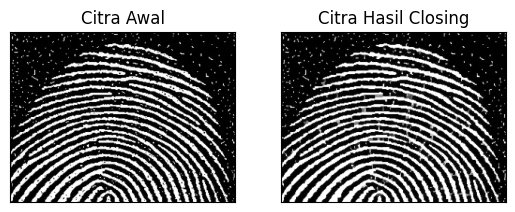

In [9]:
# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element Dilasi (Square 3x3)
se = np.ones((3, 3), np.uint8)

# Lakukan closing
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

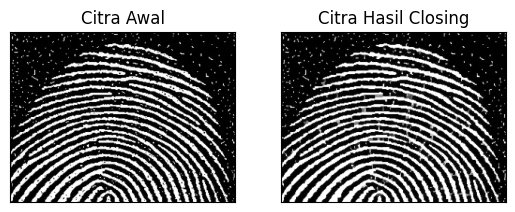

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SE) berbentuk square 3x3
se = np.ones((3, 3), np.uint8)

# Lakukan dilasi dan erosi dengan fungsi OpenCV
dilation = cv2.dilate(img, se, iterations=1)
closing = cv2.erode(dilation, se, iterations=1)

# Menampilkan citra asli dan hasil closing
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

SED=Cross3


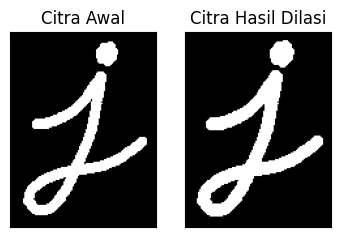

SED = Cross 5


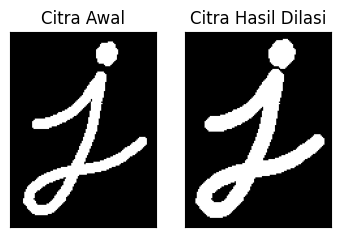

In [12]:
# dilasi cross sed
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product=temp*SED
      imgD[i,j]=np.max(product)
  return imgD

print('SED=Cross3')
img_d=cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0)
ret,thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD=dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap='gray')
plt.title('Citra Awal'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap='gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]),plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

SED = Circle 3


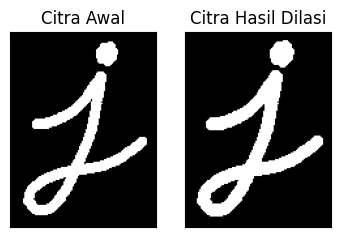

SED = Circle 5


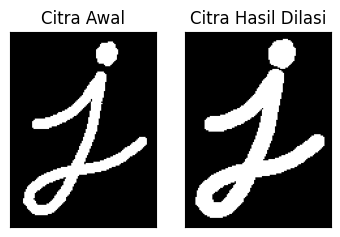

In [13]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

SE = Rectangle 3x5


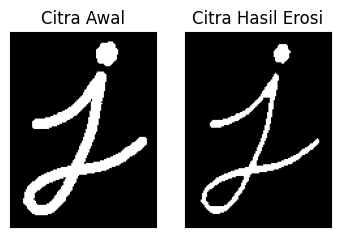

SE = Rectangle 5x7


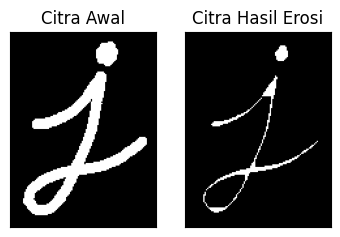

In [14]:
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

SE = Line Vertikal 3


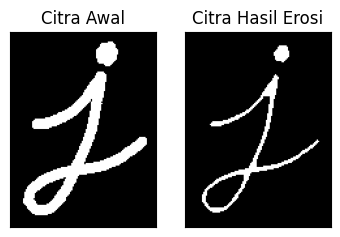

SE = Line Vertikal 5


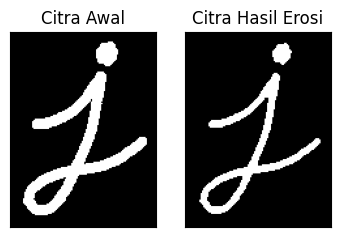

In [15]:
#Erosi Line Vertikal SE

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product=temp*SE
      imgE[i,j]=np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()